# Q6

In [54]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [55]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  
  halfsize=filter_size//2
  image=np.pad(img,halfsize,mode="reflect")
  
  return image

In [ ]:
def convolve(matrix, kernel):
    m, n = kernel.shape
    padwidth= kernel.shape[0]//2
    padded_matrix = Reflect101(matrix, m)
    x, y = padded_matrix.shape
    output = np.zeros(matrix.shape)
    for i in range(padwidth,x-padwidth):
        for j in range(padwidth,y-padwidth):
            output[i-padwidth, j-padwidth] = np.sum(padded_matrix[i-padwidth:i+padwidth+1, j-padwidth:j+padwidth+1] * kernel)
    return output

In [ ]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  half = filter_size//2
  x,y = image.shape
  for i in range(half, x-half):
    for j in range(half, y-half):
      result[i-half, j-half] = np.average(image[i-half:i+half+1, j-half:j+half+1])
  
  #######################
  #    your code here   #
  #######################
  
  return result

In [ ]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  #######################
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  half = filter_size//2
  x,y = image.shape
  for i in range(half, x-half):
    for j in range(half, y-half):
      result[i-half, j-half] = np.median(image[i-half:i+half+1, j-half:j+half+1])
  
  return result

In [ ]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    ksize = filter_size
    sigma = std
    for i in range(ksize):
        for j in range(ksize):
            kernel[i][j] = np.exp(-((i-2)**2 + (j-2)**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
    kernel = kernel / np.sum(kernel)

    #    your code here   #
    #######################
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [56]:
# Do not change this cell
image = cv2.imread('taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

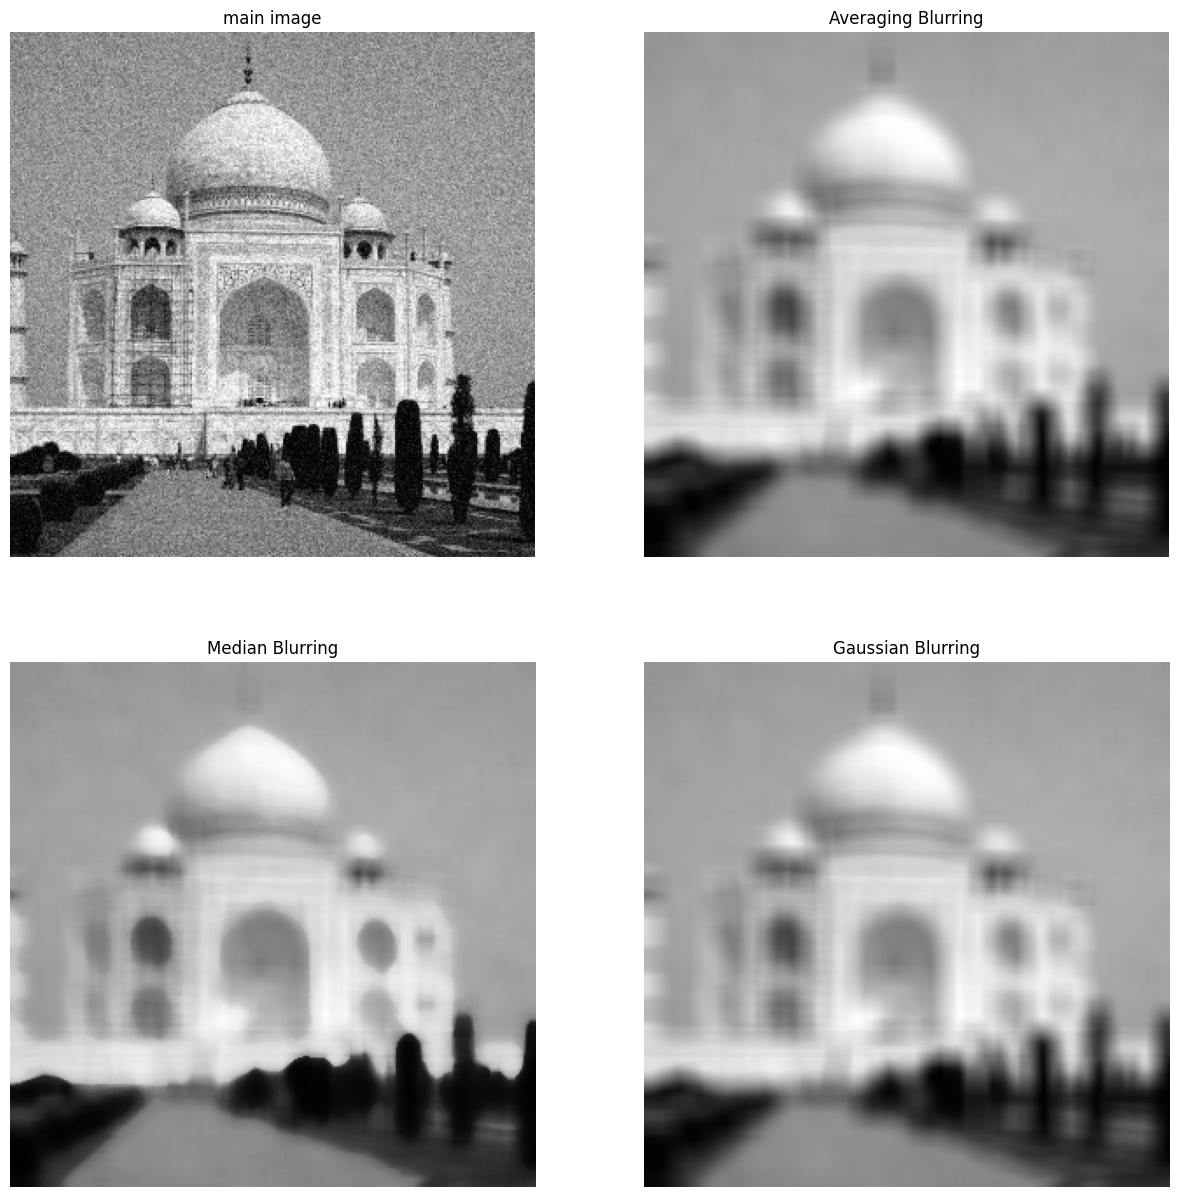

In [57]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [58]:
def caculateW(i,j,image,size,sigma,rsigma):
  
  half= size//2
  sum1=0
  sum2=0

  for k in range(i-half,i+half):
    for l in range(j-half,j+half):
      temp=np.exp((-1*((i-k)**2+(j-l)**2)/(2*sigma**2))+(-1*np.square(image[i,j]- image[k,l])/(2*rsigma**2)))
      sum2+=temp
      sum1+=image[k,l]*temp
  result= sum1/sum2
  return result

def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    image = Reflect101(img, filter_size)
    image = np.float32(image)
    # Spatial component of the kernel
    x,y=img.shape
    for i in range(x):
      for j in range(y):
        result[i,j]=caculateW(i,j,image,filter_size,std,rstd)

    
    return result

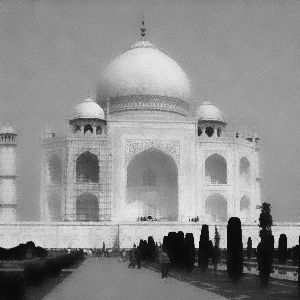

In [59]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2_imshow(bilateral)

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [60]:
AveragingBlurring = cv2.blur(image, (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, (15,15), 40)
Bilateral = cv2.bilateralFilter(image, 15, 40, 40)

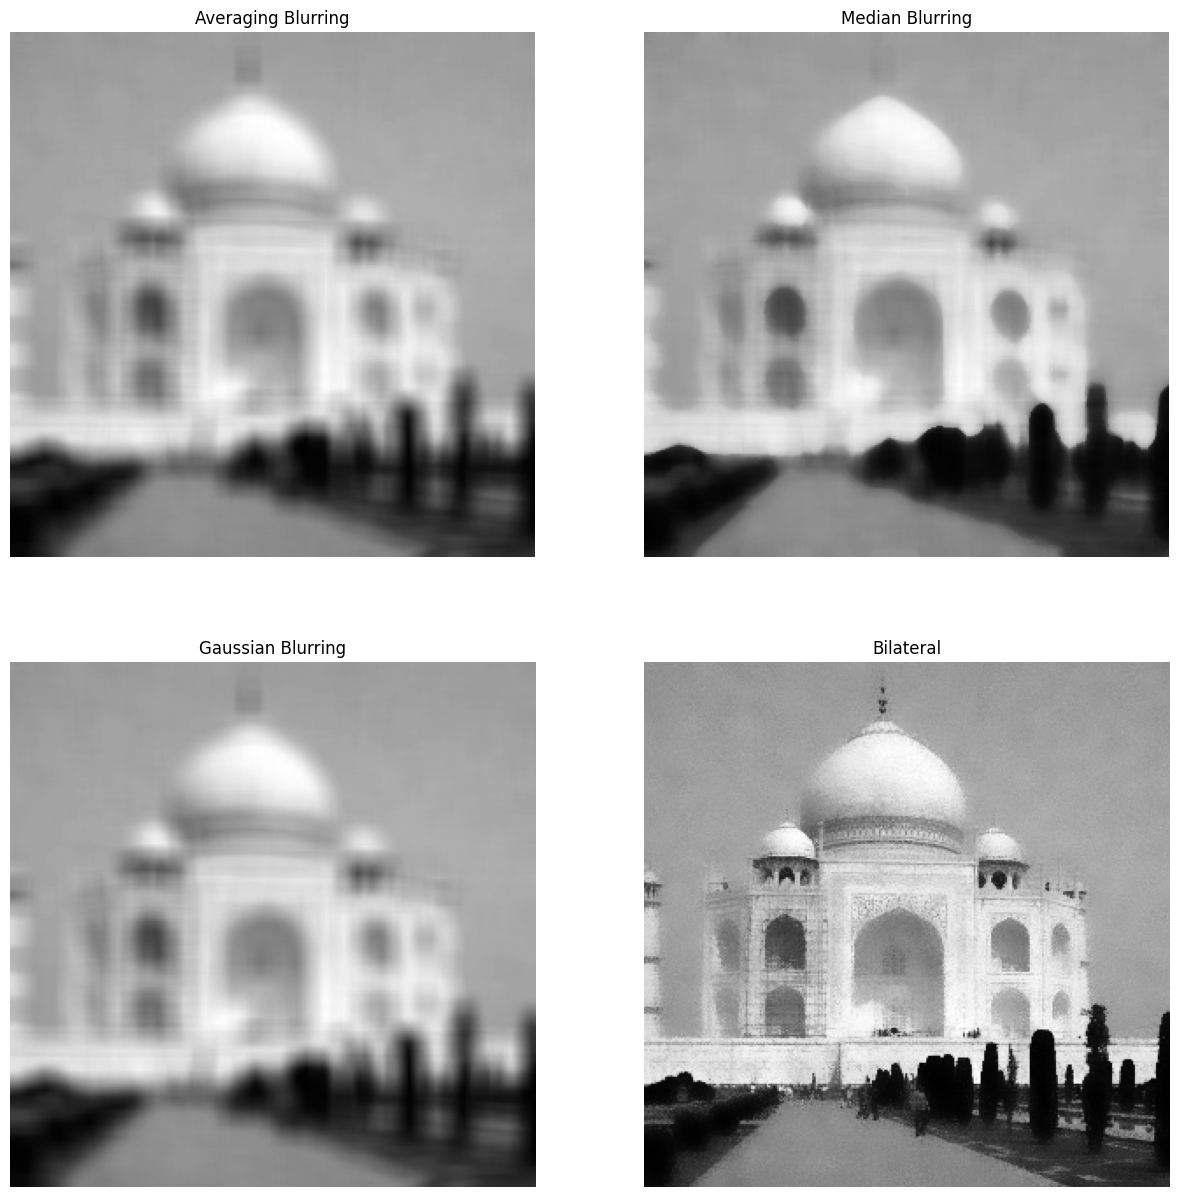

In [61]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")